# Credit Score EDA and Predicton

The purpose of this study is to create a model that classify customer's credit score for finance company. The credit score of a person determines the creditworthiness of the person. So this intelligent system help to reduce manuel efforts.

## Packages importing

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pingouin as pg
from scipy import stats
from scikit_posthocs import posthoc_conover
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from lazypredict.Supervised import LazyClassifier

## Data Read and Exploration

In [2]:
data=pd.read_csv("C:/Users/okand/Desktop/projeler2/credit score/Credit Score Data/train.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,Good,809.98,26.82,265.00,No,49.57,21.47,High_spent_Small_value_payments,312.49,Good
1,5635,3392,2,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,Good,809.98,31.94,266.00,No,49.57,21.47,Low_spent_Large_value_payments,284.63,Good
2,5636,3392,3,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,Good,809.98,28.61,267.00,No,49.57,21.47,Low_spent_Medium_value_payments,331.21,Good
3,5637,3392,4,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,Good,809.98,31.38,268.00,No,49.57,21.47,Low_spent_Small_value_payments,223.45,Good
4,5638,3392,5,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,Good,809.98,24.80,269.00,No,49.57,21.47,High_spent_Medium_value_payments,341.49,Good


In [3]:
data.shape

(100000, 28)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

I will drop some attributes that we do not need. Dataset have a variable of the number of loans taken by the person from the bank. So I can remove the avraible of Type_of_Loan.

In [5]:
# adding the customer's most preferred loan type to the data set

def max_value_count(df,col):
    ind=0
    c=[]
    while (ind<=99999):
        a=df.loc[ind,col].split(",")
        b=[]
        for i in a:
            b.append(i.strip())
        c.append(pd.Series(b).value_counts().index[0])
        ind+=1
    return c
    

In [6]:
data["Choose_most_type_of_loan"]=max_value_count(data,"Type_of_Loan")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Choose_most_type_of_loan
0,5634,3392,1,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,809.98,26.82,265.00,No,49.57,21.47,High_spent_Small_value_payments,312.49,Good,Auto Loan
1,5635,3392,2,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,809.98,31.94,266.00,No,49.57,21.47,Low_spent_Large_value_payments,284.63,Good,Auto Loan
2,5636,3392,3,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,809.98,28.61,267.00,No,49.57,21.47,Low_spent_Medium_value_payments,331.21,Good,Auto Loan
3,5637,3392,4,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,809.98,31.38,268.00,No,49.57,21.47,Low_spent_Small_value_payments,223.45,Good,Auto Loan
4,5638,3392,5,Aaron Maashoh,23.00,821000265.00,Scientist,19114.12,1824.84,3.00,...,809.98,24.80,269.00,No,49.57,21.47,High_spent_Medium_value_payments,341.49,Good,Auto Loan


In [7]:
data=data.drop(columns=["ID","Customer_ID","Name","SSN","Type_of_Loan"],axis=1)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,100000.00,4.50,2.29,1.00,2.75,4.50,6.25,8.00
Age,100000.00,33.32,10.76,14.00,24.00,33.00,42.00,56.00
Annual_Income,100000.00,50505.12,38299.42,7005.93,19342.97,36999.71,71683.47,179987.28
Monthly_Inhand_Salary,100000.00,4197.27,3186.43,303.65,1626.59,3095.91,5957.72,15204.63
Num_Bank_Accounts,100000.00,5.37,2.59,0.00,3.00,5.00,7.00,11.00
Num_Credit_Card,100000.00,5.53,2.07,0.00,4.00,5.00,7.00,11.00
Interest_Rate,100000.00,14.53,8.74,1.00,7.00,13.00,20.00,34.00
Num_of_Loan,100000.00,3.53,2.45,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,100000.00,21.08,14.80,0.00,10.00,18.00,28.00,62.00
Num_of_Delayed_Payment,100000.00,13.31,6.24,0.00,9.00,14.00,18.00,25.00


The Annual Income of the person, monthly in-hand salary of the person, the outstanding balance of the person, the age of the credit history of the person, the total EMI per month of the person, the monthly amount invested by the person and The monthly balance left in the account of the person variables have high difference between its min value and max value. Also these variables have high standard deviation and high difference its mean value and median value. It can be thought that these variables do not fit the normal distribution.

The minimum values all of these variables do not include negative. So it can be thought that incorrect data was entered.

In [9]:
# Convert objects to categorical variables
object_columns = data.select_dtypes("object").columns

# Month are integer but also categorical values
object_columns = np.append(object_columns,"Month")

print(object_columns)

['Occupation' 'Credit_Mix' 'Payment_of_Min_Amount' 'Payment_Behaviour'
 'Credit_Score' 'Choose_most_type_of_loan' 'Month']


In [10]:
for colname in object_columns:
    data[colname] = data[colname].astype('category')  

# Check it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   Month                     100000 non-null  category
 1   Age                       100000 non-null  float64 
 2   Occupation                100000 non-null  category
 3   Annual_Income             100000 non-null  float64 
 4   Monthly_Inhand_Salary     100000 non-null  float64 
 5   Num_Bank_Accounts         100000 non-null  float64 
 6   Num_Credit_Card           100000 non-null  float64 
 7   Interest_Rate             100000 non-null  float64 
 8   Num_of_Loan               100000 non-null  float64 
 9   Delay_from_due_date       100000 non-null  float64 
 10  Num_of_Delayed_Payment    100000 non-null  float64 
 11  Changed_Credit_Limit      100000 non-null  float64 
 12  Num_Credit_Inquiries      100000 non-null  float64 
 13  Credit_Mix                1000

In [11]:
## Check missing value:
data.isnull().sum()/len(data)*100

Month                      0.00
Age                        0.00
Occupation                 0.00
Annual_Income              0.00
Monthly_Inhand_Salary      0.00
Num_Bank_Accounts          0.00
Num_Credit_Card            0.00
Interest_Rate              0.00
Num_of_Loan                0.00
Delay_from_due_date        0.00
Num_of_Delayed_Payment     0.00
Changed_Credit_Limit       0.00
Num_Credit_Inquiries       0.00
Credit_Mix                 0.00
Outstanding_Debt           0.00
Credit_Utilization_Ratio   0.00
Credit_History_Age         0.00
Payment_of_Min_Amount      0.00
Total_EMI_per_month        0.00
Amount_invested_monthly    0.00
Payment_Behaviour          0.00
Monthly_Balance            0.00
Credit_Score               0.00
Choose_most_type_of_loan   0.00
dtype: float64

In [12]:
# Check for duplicate data
duplicate = data.duplicated()
print(duplicate.sum())

0


I am planning separate the dataset as train, validation and test. After training the model with the training dataset i will validate the model with validation data set and compare the model with test data set.

In [13]:
x=data.drop(columns="Credit_Score",axis=1)
y=data["Credit_Score"]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)
print(x_train.shape)

(90000, 23)


## Exploratory Data Analysis and Data Preprocessing

### Examination of Continuous Variables

In [14]:
train_df=x_train
train_df["Credit_Score"]=y_train

test_df=x_test
test_df["Credit_Score"]=y_test

train_df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Choose_most_type_of_loan,Credit_Score
15241,2,18.00,Lawyer,19092.79,1781.07,10.00,8.00,19.00,7.00,41.00,...,1445.08,28.99,126.00,Yes,64.62,22.08,High_spent_Small_value_payments,249.43,Personal Loan,Poor
95040,1,34.00,Media_Manager,108115.05,9022.59,6.00,5.00,18.00,3.00,27.00,...,1149.16,31.69,302.00,Yes,206.58,145.58,Low_spent_Small_value_payments,650.26,Debt Consolidation Loan,Standard
7189,6,34.00,Lawyer,20380.87,1660.41,0.00,1.00,1.00,2.00,5.00,...,156.32,40.39,253.00,No,24.37,29.45,Low_spent_Medium_value_payments,372.57,Not Specified,Standard
91205,6,24.00,Lawyer,62424.12,5010.01,7.00,8.00,29.00,5.00,53.00,...,1958.36,27.06,152.00,Yes,175.36,55.10,Low_spent_Small_value_payments,351.01,Debt Consolidation Loan,Poor
89491,4,15.00,Doctor,80718.56,6543.55,3.00,6.00,10.00,7.00,13.00,...,1346.31,31.47,229.00,Yes,368.43,67.71,High_spent_Medium_value_payments,376.05,Home Equity Loan,Standard


In [15]:
numeric_col_names=train_df.select_dtypes(include="float").columns
len(numeric_col_names)

17

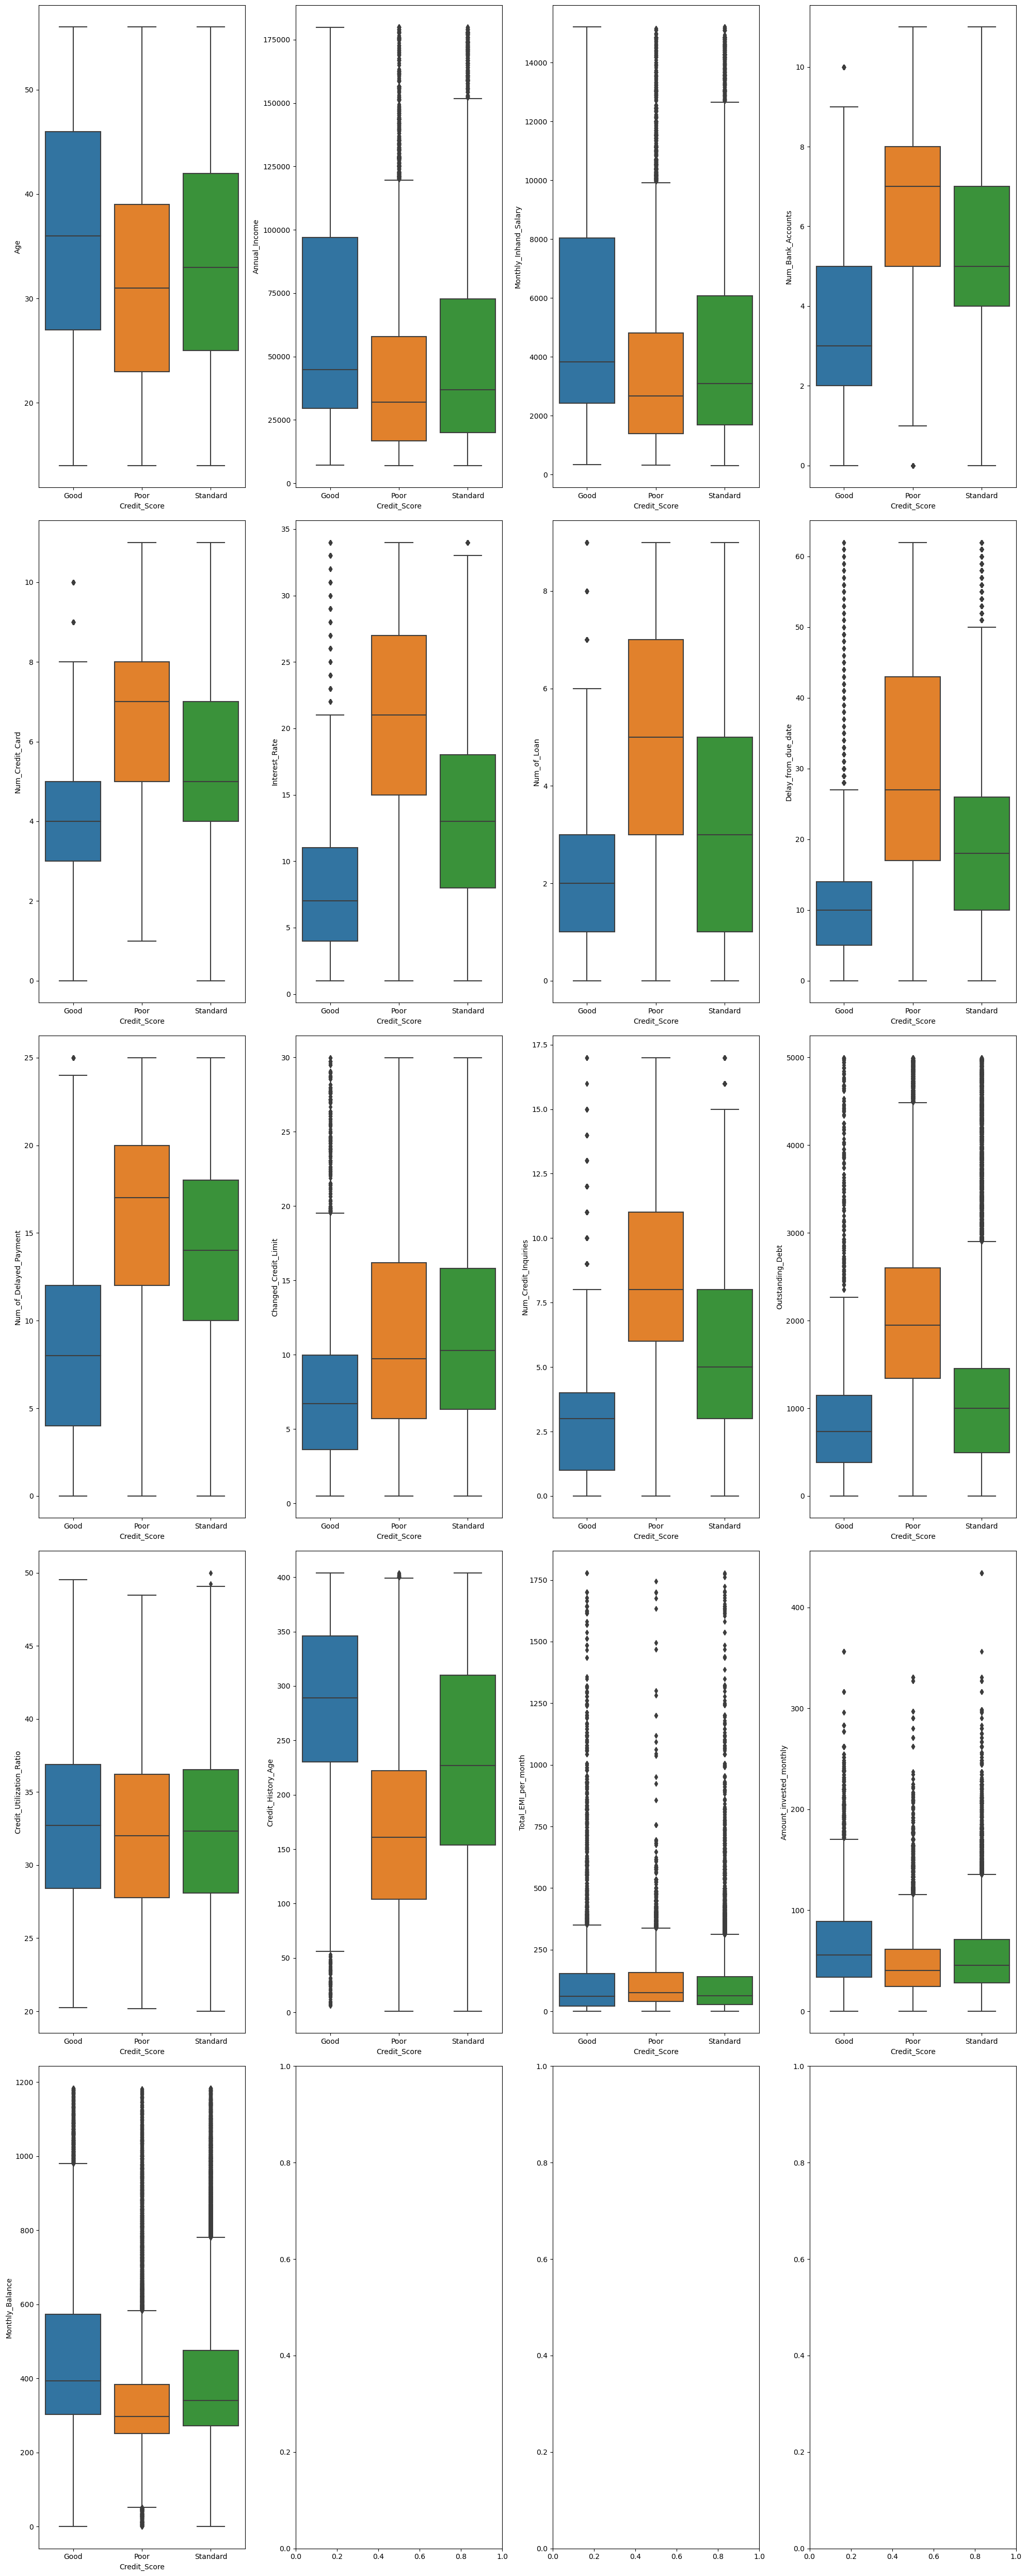

In [16]:
fig,axes=plt.subplots(5, 4, figsize=(20,50))

for i,ax in enumerate(fig.axes):
    if i<(len(numeric_col_names)):
        sns.boxplot(data=train_df, x="Credit_Score", y=numeric_col_names[i], ax=ax)
fig.tight_layout()

* Credit utilization ratio doesn’t affect much on credit scores.
* The number of EMIs doesn’t affect much on credit scores.
* The monthly amount invested by the person doesn’t affect credit scores a lot.

After running anova test i will remove these variables from dataset. Then i will examine the correlation between independent continuous variables.

In [17]:
numeric_col_names

Index(['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance'],
      dtype='object')

In [19]:
val_for_anova=train_df[numeric_col_names]
val_for_anova["Credit_Score"]=train_df["Credit_Score"]
val_for_anova.head(10)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
15241,18.00,19092.79,1781.07,10.00,8.00,19.00,7.00,41.00,16.00,5.99,9.00,1445.08,28.99,126.00,64.62,22.08,249.43,Poor
95040,34.00,108115.05,9022.59,6.00,5.00,18.00,3.00,27.00,16.00,1.27,0.00,1149.16,31.69,302.00,206.58,145.58,650.26,Standard
7189,34.00,20380.87,1660.41,0.00,1.00,1.00,2.00,5.00,0.00,10.75,1.00,156.32,40.39,253.00,24.37,29.45,372.57,Standard
91205,24.00,62424.12,5010.01,7.00,8.00,29.00,5.00,53.00,18.00,24.58,6.00,1958.36,27.06,152.00,175.36,55.10,351.01,Poor
89491,15.00,80718.56,6543.55,3.00,6.00,10.00,7.00,13.00,11.00,14.77,6.00,1346.31,31.47,229.00,368.43,67.71,376.05,Standard
401,25.00,49967.01,4091.92,7.00,6.00,31.00,6.00,27.00,11.00,19.87,11.00,2253.95,23.12,203.00,156.00,59.50,390.90,Poor
73572,20.00,60829.80,5207.15,4.00,5.00,2.00,3.00,7.00,4.00,0.64,2.00,445.39,28.42,389.00,106.32,131.21,325.82,Standard
16148,41.00,65588.10,4813.72,7.00,4.00,11.00,3.00,23.00,17.00,8.33,0.00,1292.14,31.15,372.00,609.02,34.54,156.66,Good
65350,21.00,25444.95,2342.41,8.00,6.00,10.00,2.00,21.00,17.00,4.22,12.00,249.67,27.34,196.00,30.78,25.77,404.47,Standard
1492,15.00,10405.01,694.08,6.00,7.00,30.00,5.00,54.00,15.00,13.66,9.00,2086.22,24.29,180.00,33.60,10.92,290.35,Poor


In [25]:
## Anova Test for Age variable..

# Normality Test:

g1=val_for_anova[val_for_anova["Credit_Score"]=="Poor"]
g2=val_for_anova[val_for_anova["Credit_Score"]=="Standard"]
g3=val_for_anova[val_for_anova["Credit_Score"]=="Good"]

normality=stats.shapiro(g1["Age"])
print(normality[1])

normality2=stats.shapiro(g2["Age"])
print(normality[1])

normality3=stats.shapiro(g3["Age"])
print(normality[1]) #p value

0.0
0.0
0.0


In [26]:
homoscedasticity=stats.bartlett(g1["Age"],g2["Age"],g3["Age"])
print(homoscedasticity)

BartlettResult(statistic=297.73517062628764, pvalue=2.2265331432344083e-65)


The assumptions of the Anova test cannot be met. The nonparametric equivalent of the Anova test is applied.

In [27]:
## Kruskal Wallis H test

test=pg.kruskal(val_for_anova, dv="Age", between="Credit_Score")
print(test)


               Source  ddof1       H  p-unc
Kruskal  Credit_Score      2 2135.22   0.00


p value less than 0.05. H0 hypothesis is rejected. There is a difference between at least two groups with 95% confidence.

In [30]:
posthoc=posthoc_conover(val_for_anova, val_col="Age",group_col="Credit_Score",p_adjust="bonf")
print(posthoc)

          Good  Poor  Standard
Good      1.00  0.00      0.00
Poor      0.00  1.00      0.00
Standard  0.00  0.00      1.00


In [18]:
train_df=train_df.drop(columns=["Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly"],axis=1)
test_df=test_df.drop(columns=["Credit_Utilization_Ratio","Total_EMI_per_month","Amount_invested_monthly"],axis=1)

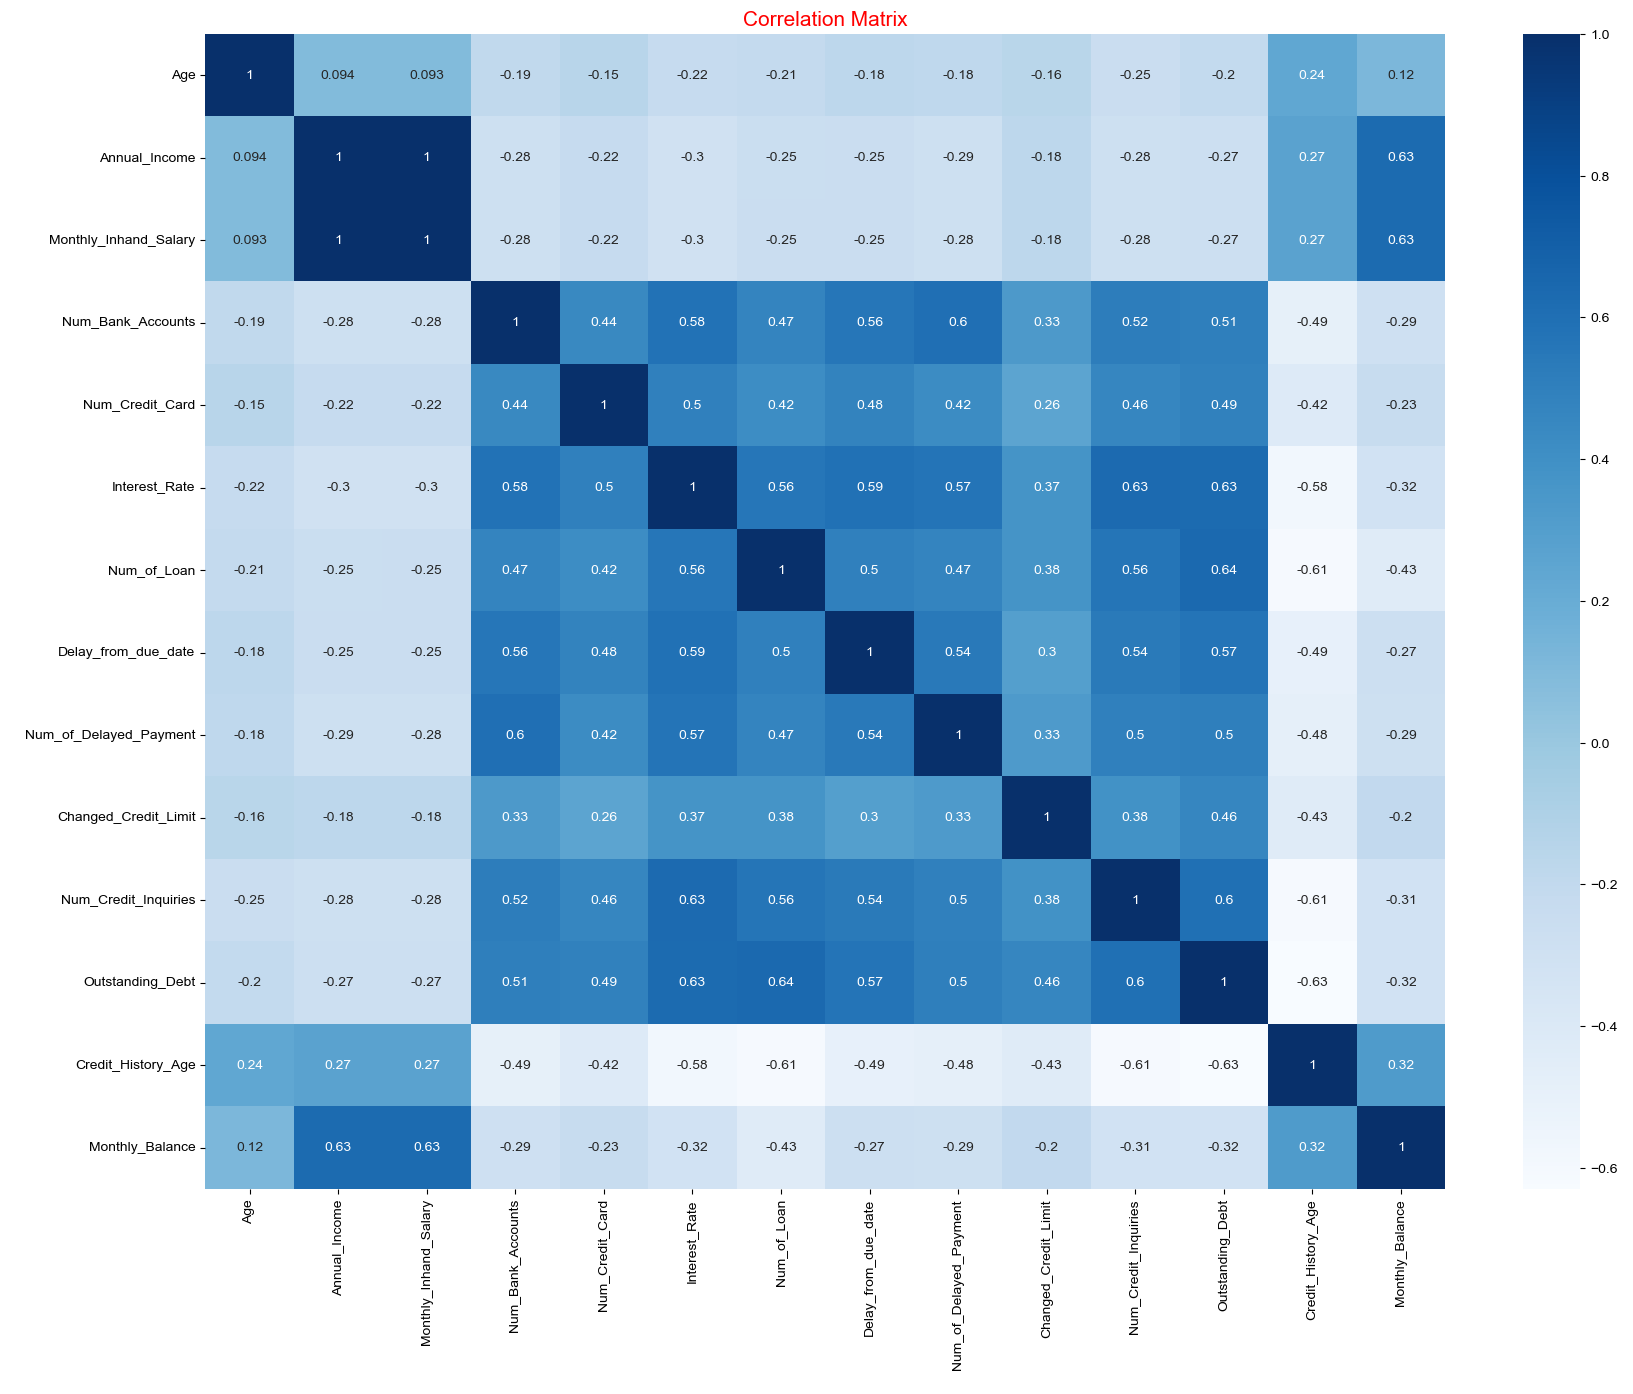

In [19]:
corr_train_df=train_df.corr()
plt.figure(figsize=(20,15))
plt.title("Correlation Matrix", color="red", fontsize=15)
sns.heatmap(corr_train_df,annot=True,cmap="Blues")
sns.set(font_scale=2,style='white')
plt.show()

If the power of correlation between two continuous variables is higher than 0.6, there is high correlation between these two variables. It would be helpful to remove either one from the dataset. But first i will examine the statistical significance by doing a correlation test. According to the central limit theory, if the number of observations is greater than 30, the assumption of normality is valid.

Normality test:

In [20]:
numeric_col_names=train_df.select_dtypes(include="float").columns.tolist()

normality=pg.normality(train_df[numeric_col_names])
print(normality)


                          W  pval  normal
Age                    0.97  0.00   False
Annual_Income          0.88  0.00   False
Monthly_Inhand_Salary  0.88  0.00   False
Num_Bank_Accounts      0.97  0.00   False
Num_Credit_Card        0.97  0.00   False
Interest_Rate          0.95  0.00   False
Num_of_Loan            0.95  0.00   False
Delay_from_due_date    0.92  0.00   False
Num_of_Delayed_Payment 0.98  0.00   False
Changed_Credit_Limit   0.95  0.00   False
Num_Credit_Inquiries   0.96  0.00   False
Outstanding_Debt       0.88  0.00   False
Credit_History_Age     0.98  0.00   False
Monthly_Balance        0.88  0.00   False


In [21]:
sign=pg.pairwise_corr(train_df[numeric_col_names])
pd.set_option("display.max_rows",None)

print(sign[sign["p-unc"]>0.05]) # Are there insignificance?

Empty DataFrame
Columns: [X, Y, method, alternative, n, r, CI95%, p-unc, BF10, power]
Index: []


Correlations between variables are statistically significant.

In [22]:
print(sign[(sign["p-unc"]<0.05)&(sign["r"]>=0.6)])

                        X                       Y   method alternative      n  \
13          Annual_Income   Monthly_Inhand_Salary  pearson   two-sided  90000   
24          Annual_Income         Monthly_Balance  pearson   two-sided  90000   
35  Monthly_Inhand_Salary         Monthly_Balance  pearson   two-sided  90000   
40      Num_Bank_Accounts  Num_of_Delayed_Payment  pearson   two-sided  90000   
59          Interest_Rate    Num_Credit_Inquiries  pearson   two-sided  90000   
60          Interest_Rate        Outstanding_Debt  pearson   two-sided  90000   
67            Num_of_Loan        Outstanding_Debt  pearson   two-sided  90000   

      r         CI95%  p-unc BF10  power  
13 1.00    [1.0, 1.0]   0.00  nan   1.00  
24 0.63  [0.62, 0.63]   0.00  inf   1.00  
35 0.63  [0.62, 0.63]   0.00  inf   1.00  
40 0.60   [0.6, 0.61]   0.00  inf   1.00  
59 0.63  [0.63, 0.64]   0.00  inf   1.00  
60 0.63  [0.63, 0.63]   0.00  inf   1.00  
67 0.64  [0.63, 0.64]   0.00  inf   1.00  


In [23]:
train_df=train_df.drop(columns=["Monthly_Inhand_Salary","Monthly_Balance","Num_of_Delayed_Payment","Num_Credit_Inquiries","Outstanding_Debt"],axis=1)
test_df=test_df.drop(columns=["Monthly_Inhand_Salary","Monthly_Balance","Num_of_Delayed_Payment","Num_Credit_Inquiries","Outstanding_Debt"],axis=1)

### Examination of Categorical Variables

In [24]:
categorical_col_names=train_df.select_dtypes(include="category").columns.tolist()
categorical_col_names

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour',
 'Choose_most_type_of_loan',
 'Credit_Score']

In [25]:
train_df[categorical_col_names].nunique(axis=0)

Month                        8
Occupation                  15
Credit_Mix                   3
Payment_of_Min_Amount        3
Payment_Behaviour            6
Choose_most_type_of_loan    10
Credit_Score                 3
dtype: int64

In [26]:
train_df.groupby("Occupation")["Occupation"].value_counts()  # .value_counts() is used to see the values in column "Occupation"

Occupation     Occupation   
Accountant     Accountant       6068
               Architect           0
               Developer           0
               Doctor              0
               Engineer            0
               Entrepreneur        0
               Journalist          0
               Lawyer              0
               Manager             0
               Mechanic            0
               Media_Manager       0
               Musician            0
               Scientist           0
               Teacher             0
               Writer              0
Architect      Architect        6135
               Accountant          0
               Developer           0
               Doctor              0
               Engineer            0
               Entrepreneur        0
               Journalist          0
               Lawyer              0
               Manager             0
               Mechanic            0
               Media_Manager       0
         

In [27]:
train_df.groupby("Choose_most_type_of_loan")["Choose_most_type_of_loan"].value_counts()

Choose_most_type_of_loan  Choose_most_type_of_loan
Auto Loan                 Auto Loan                    8481
                          Credit-Builder Loan             0
                          Debt Consolidation Loan         0
                          Home Equity Loan                0
                          Mortgage Loan                   0
                          No Data                         0
                          Not Specified                   0
                          Payday Loan                     0
                          Personal Loan                   0
                          Student Loan                    0
Credit-Builder Loan       Credit-Builder Loan          9459
                          Auto Loan                       0
                          Debt Consolidation Loan         0
                          Home Equity Loan                0
                          Mortgage Loan                   0
                          No Data                

I will measure relation between independent variables and depend variable by using chi square test.

In [28]:
data_cat=train_df.select_dtypes(include=["category"])

le=LabelEncoder()

for i in data_cat.columns:
    data_cat[i]=le.fit_transform(data_cat[i])

data_cat.head()

,Month,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Choose_most_type_of_loan,Credit_Score
15241,1,7,0,2,2,8,1
95040,0,10,2,2,5,2,2
7189,5,7,1,1,4,6,2
91205,5,7,2,2,5,2,1
89491,3,3,2,2,1,3,2


In [29]:
X_c=data_cat.drop(columns="Credit_Score",axis=1)
y_c=data_cat["Credit_Score"]

<Axes: >

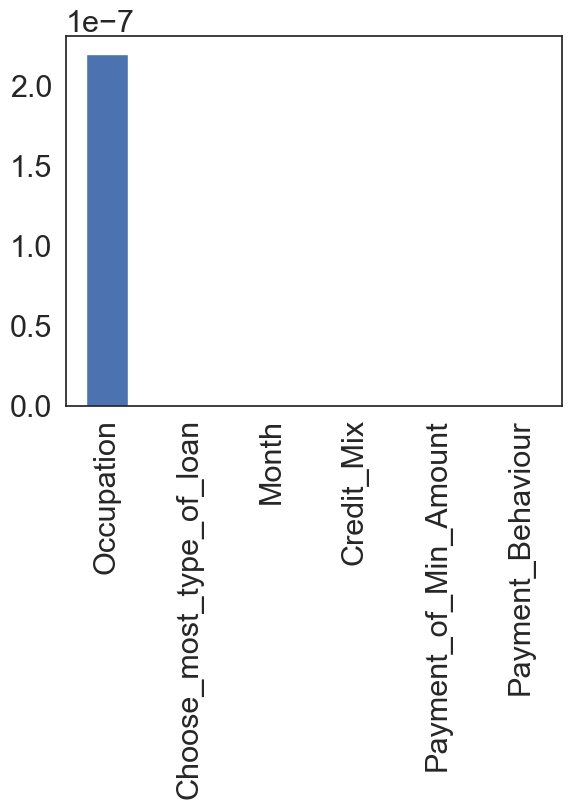

In [30]:
chi_scores=chi2(X_c,y_c)

p_values = pd.Series(chi_scores[1],index = X_c.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

Because of p-value of Occupation is higher than 0.05, this variable is independent of the dependent variable. I will remove this variable from dataset.

In [31]:
train_df=train_df.drop(columns=["Occupation"],axis=1)
test_df=test_df.drop(columns=["Occupation"],axis=1)

In [32]:
print(train_df.shape)
print(test_df.shape)

(90000, 15)
(10000, 15)


### Outliers Detection with z score

The further away an observation’s Z-score is from zero, the more unusual it is. If the z score of a variable in the dataset is more than 3 or less than -3, then we can say that the variable has an outlier value.

In [33]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,90000.00,33.32,10.77,14.00,24.00,33.00,42.00,56.00
Annual_Income,90000.00,50431.58,38267.12,7005.93,19297.28,36943.98,71616.36,179987.28
Num_Bank_Accounts,90000.00,5.37,2.59,0.00,3.00,6.00,7.00,11.00
Num_Credit_Card,90000.00,5.54,2.07,0.00,4.00,5.00,7.00,11.00
Interest_Rate,90000.00,14.55,8.74,1.00,7.00,13.00,20.00,34.00
Num_of_Loan,90000.00,3.54,2.45,0.00,2.00,3.00,5.00,9.00
Delay_from_due_date,90000.00,21.10,14.80,0.00,10.00,18.00,28.00,62.00
Changed_Credit_Limit,90000.00,10.48,6.61,0.50,5.38,9.41,14.87,29.98
Credit_History_Age,90000.00,221.09,99.71,1.00,144.00,219.00,302.00,404.00


In [34]:
integer=["Age","Num_Bank_Accounts","Num_Credit_Card","Interest_Rate","Num_of_Loan","Delay_from_due_date","Credit_History_Age"]
floatt=["Annual_Income","Changed_Credit_Limit"]

In [35]:
for column in integer:
    train_df[column] = pd.to_numeric(train_df[column], errors="coerce")
  
    max_value = (3*train_df[column].std()) + train_df[column].mean() 
    min_value = -((3*train_df[column].std()) + train_df[column].mean()) 

    mean = train_df.loc[(train_df[column] > min_value) & (train_df[column] < max_value), column].mean() 


    if mean is not np.nan:  
        train_df.loc[(train_df[column] < min_value) | (train_df[column] > max_value), column] = mean 
        train_df[column].fillna(mean, inplace=True) 
    else: 
        train_df[column].fillna(train_df[column].mean(), inplace=True) 

    train_df[column] = train_df[column].astype("int64")
    
for column in floatt:
    train_df[column] = pd.to_numeric(train_df[column], errors="coerce")
  
    max_value = (3*train_df[column].std()) + train_df[column].mean() 
    min_value = -((3*train_df[column].std()) + train_df[column].mean()) 

    mean = train_df.loc[(train_df[column] > min_value) & (train_df[column] < max_value), column].mean() 


    if mean is not np.nan:  
        train_df.loc[(train_df[column] < min_value) | (train_df[column] > max_value), column] = mean 
        train_df[column].fillna(mean, inplace=True) 
    else: 
        train_df[column].fillna(train_df[column].mean(), inplace=True) 

    train_df[column] = train_df[column].astype("float64")

I have filled outliers with their mean. Now i will look at the new distribution of continuous variables.

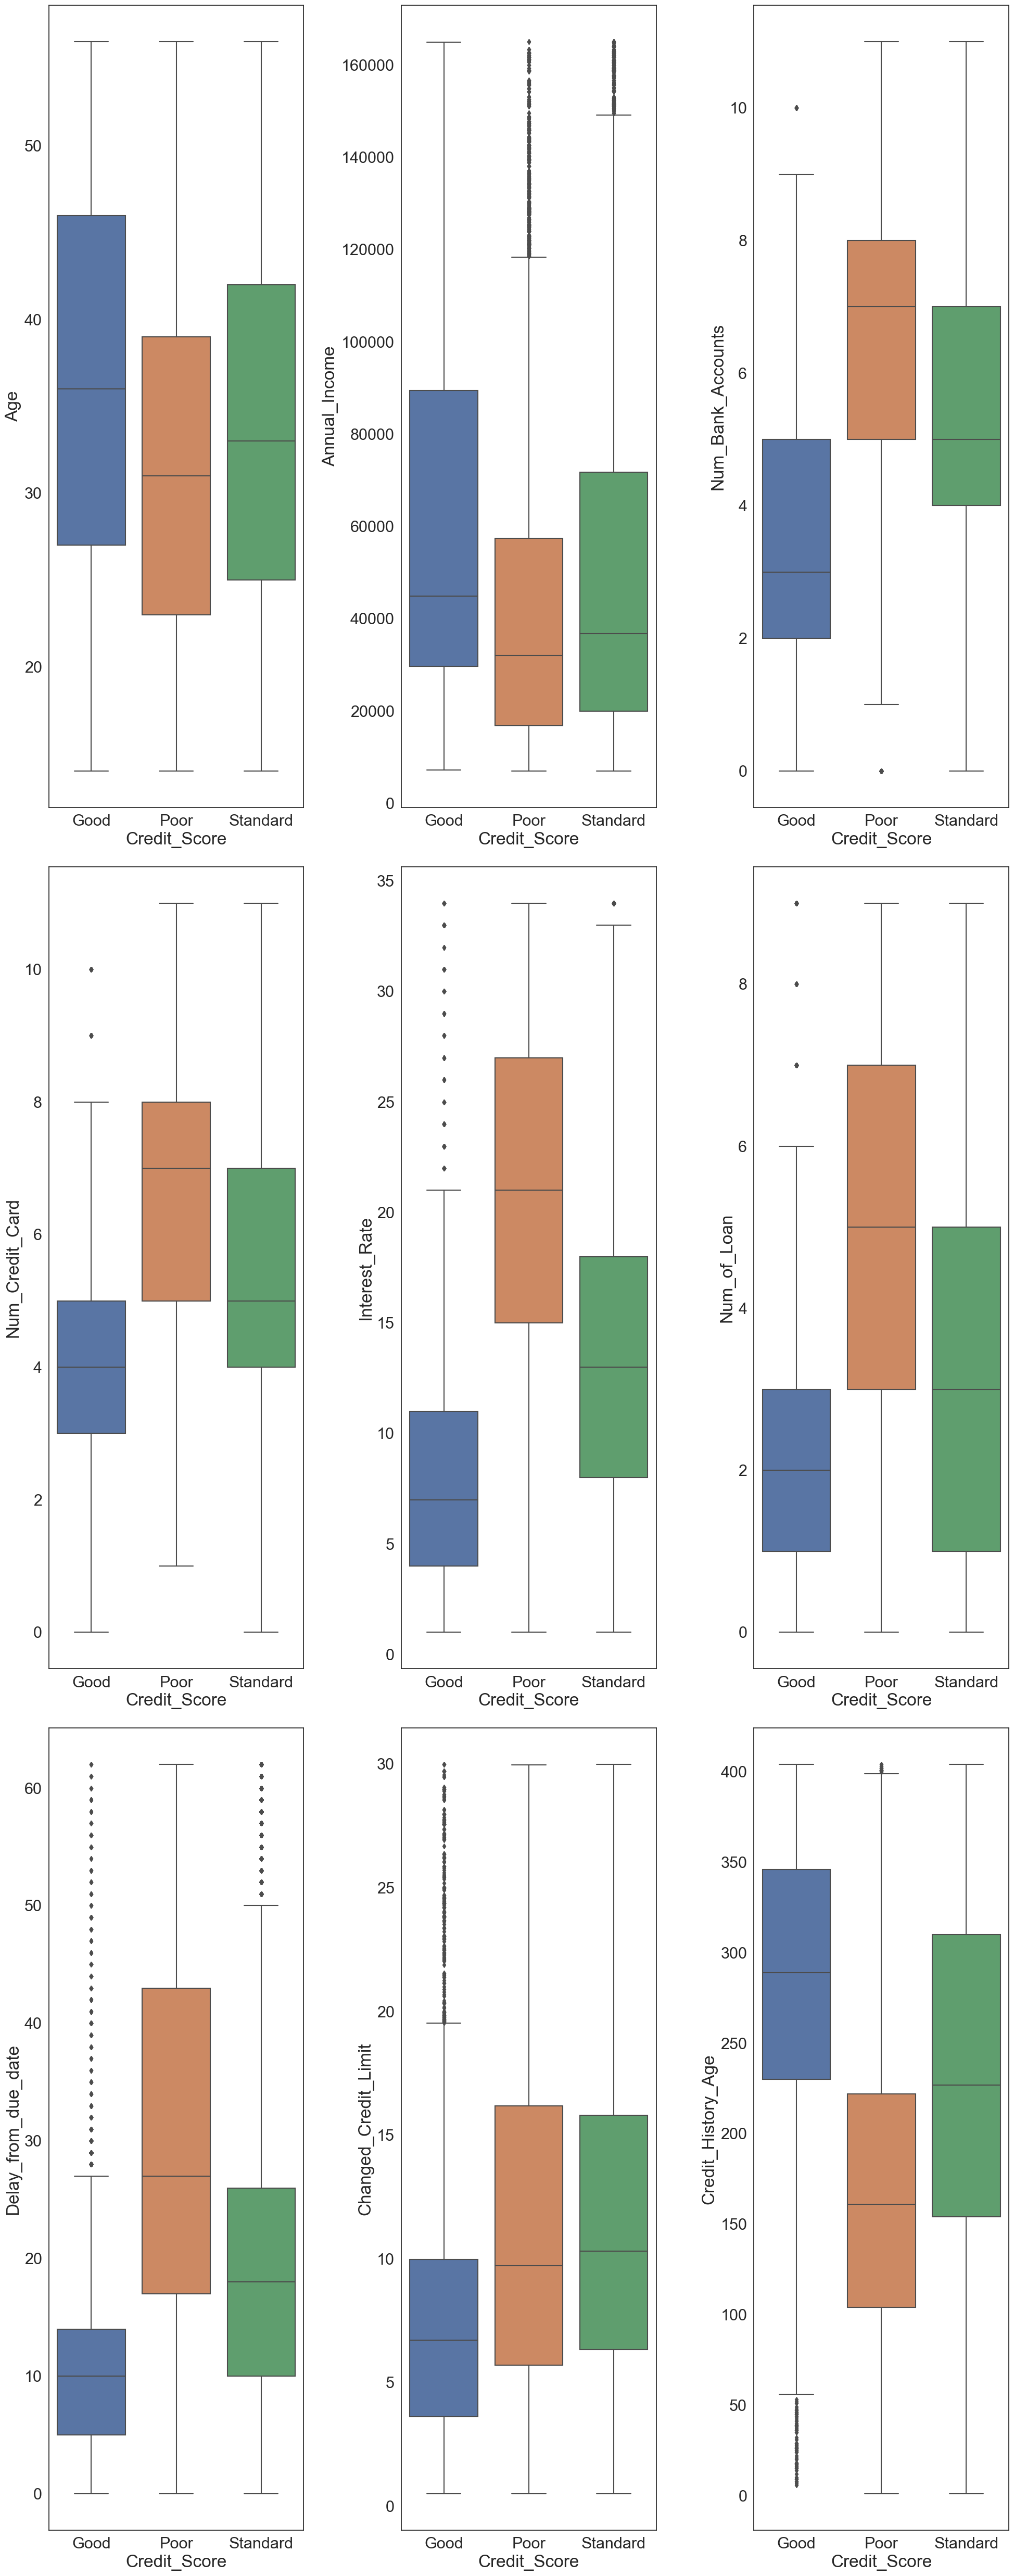

In [36]:
numeric_col_names=train_df.select_dtypes(include=["float64","int64"]).columns.tolist()
fig,axes=plt.subplots(3, 3, figsize=(20,50))

for i,ax in enumerate(fig.axes):
    if i<(len(numeric_col_names)):
        sns.boxplot(data=train_df, x="Credit_Score", y=numeric_col_names[i], ax=ax)
fig.tight_layout()

I will apply one hot encoder conversion for the categorical variables and standard scaler conversion for the continuous variables. Because the ranges of continuous variables are different from each other.

In [37]:
X_train=train_df.drop(columns="Credit_Score",axis=1)
y_train=train_df["Credit_Score"]

X_test=test_df.drop(columns="Credit_Score",axis=1)
y_test=test_df["Credit_Score"]

In [38]:
def category(df1,df2,col):
    le=LabelEncoder()
    le1=le.fit_transform(df1[col]).reshape(-1,1)
    le2=le.transform(df2[col]).reshape(-1,1)
    oh=OneHotEncoder(sparse=False)
    sutunad=[col+" "+str(i) for i in le.classes_]
    train_onehot=pd.DataFrame(oh.fit_transform(le1),columns=sutunad)
    test_onehot=pd.DataFrame(oh.fit_transform(le2),columns=sutunad)
    return train_onehot,test_onehot

In [39]:
continues_columns=X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
X_train_df_new=X_train[continues_columns]
X_test_df_new=X_test[continues_columns]

sc=StandardScaler()
X_train_df_new=sc.fit_transform(X_train_df_new)
X_test_df_new=sc.transform(X_test_df_new)

X_train_df_new=pd.DataFrame(X_train_df_new,columns=continues_columns)
X_test_df_new=pd.DataFrame(X_test_df_new,columns=continues_columns)

In [40]:
cat_columns=X_train.select_dtypes(include="category").columns.tolist()
for column in cat_columns:
    a=category(X_train,X_test,column)[0]
    b=category(X_train,X_test,column)[1]
    X_train_df_new=pd.concat([X_train_df_new,a],axis=1)
    X_test_df_new=pd.concat([X_test_df_new,b],axis=1)

In [41]:
X_train_df_new.head()

,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Credit_History_Age,Month 1,...,Choose_most_type_of_loan Auto Loan,Choose_most_type_of_loan Credit-Builder Loan,Choose_most_type_of_loan Debt Consolidation Loan,Choose_most_type_of_loan Home Equity Loan,Choose_most_type_of_loan Mortgage Loan,Choose_most_type_of_loan No Data,Choose_most_type_of_loan Not Specified,Choose_most_type_of_loan Payday Loan,Choose_most_type_of_loan Personal Loan,Choose_most_type_of_loan Student Loan
0,-1.42,-0.83,1.78,1.19,0.51,1.42,1.34,-0.68,-0.95,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.06,1.64,0.24,-0.26,0.39,-0.22,0.40,-1.39,0.81,1.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.06,-0.80,-2.07,-2.19,-1.55,-0.63,-1.09,0.04,0.32,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
3,-0.87,0.37,0.63,1.19,1.65,0.60,2.16,2.13,-0.69,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-1.70,0.88,-0.92,0.22,-0.52,1.42,-0.55,0.65,0.08,0.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00


In [42]:
print(X_train_df_new.shape)
print(X_test_df_new.shape)

(90000, 39)
(10000, 39)


In [43]:
for i in X_train_df_new.columns.tolist():
    if i not in X_test_df_new.columns.tolist():
        print(i)

In [44]:
for i in X_test_df_new.columns.tolist():
    if i not in X_train_df_new.columns.tolist():
        print(i)

In [45]:
y_train=y_train.reset_index().drop(columns="index")
y_test=y_test.reset_index().drop(columns="index")

In [46]:
#le=LabelEncoder()
#y_train=le.fit_transform(y_train)
#y_test=le.transform(y_test)

In [49]:
x_train,x_val,y_train,y_val=train_test_split(X_train_df_new,y_train,test_size=0.2,random_state=0)

In [ ]:
clf=LazyClassifier()
modeller,tahmin=clf.fit(x_train,x_val,y_train,y_val)
sıra=modeller.sort_values(by="Accuracy",ascending=False)

plt.figure(figsize=(12,10))
plt.barh(sıra.index,sıra["Accuracy"]) # ön eğleme için görüş verir...
plt.xlim([0,1])
plt.show()